In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
advertising = pd.read_csv(r'C:\Users\asbay\OneDrive\Masaüstü\Walmart_Store_sales.csv')
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
advertising.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [17]:
advertising=advertising.drop(['Date'], axis=1) # delete the column titled as 'Date' from the dataset

In [19]:
advertising.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
advertising.describe()

In [9]:
features = advertising.columns

In [11]:
print (features)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [13]:
unique_values = []
for i in features:
    unique_values.append((i,advertising[i].unique()))

In [15]:
unique_values

[('Store',
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)),
 ('Date',
  array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
         '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
         '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
         '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
         '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
         '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
         '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
         '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
         '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
         '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
         '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
         '10-12-2010', '17-12-2010', '24-

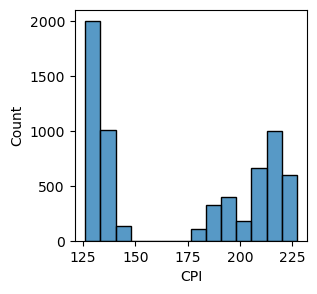

In [23]:
plt.figure(figsize=(3,3))
sns.histplot(advertising['CPI'])
plt.show()

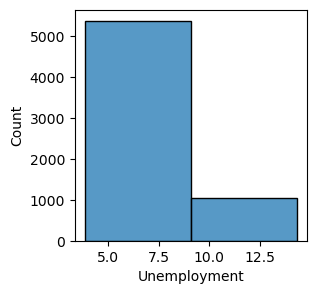

In [27]:
plt.figure(figsize=(3,3))
sns.histplot(advertising['Unemployment'], binwidth=5)
plt.show()

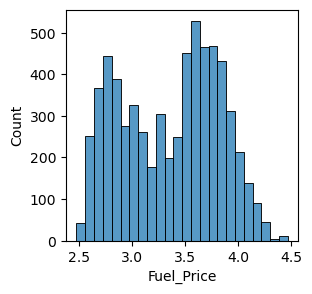

In [29]:
plt.figure(figsize=(3,3))
sns.histplot(advertising['Fuel_Price'])
plt.show()

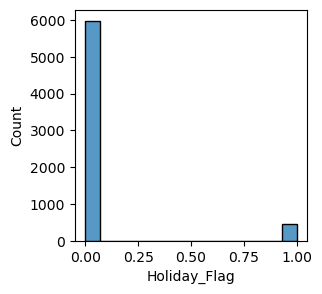

In [143]:
plt.figure(figsize=(3,3))
sns.histplot(advertising['Holiday_Flag'])
plt.show()

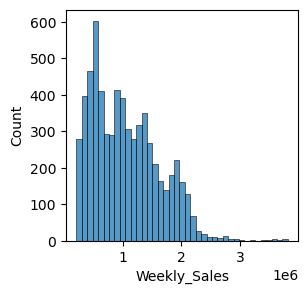

In [145]:
plt.figure(figsize=(3,3))
sns.histplot(advertising['Weekly_Sales'])
plt.show()

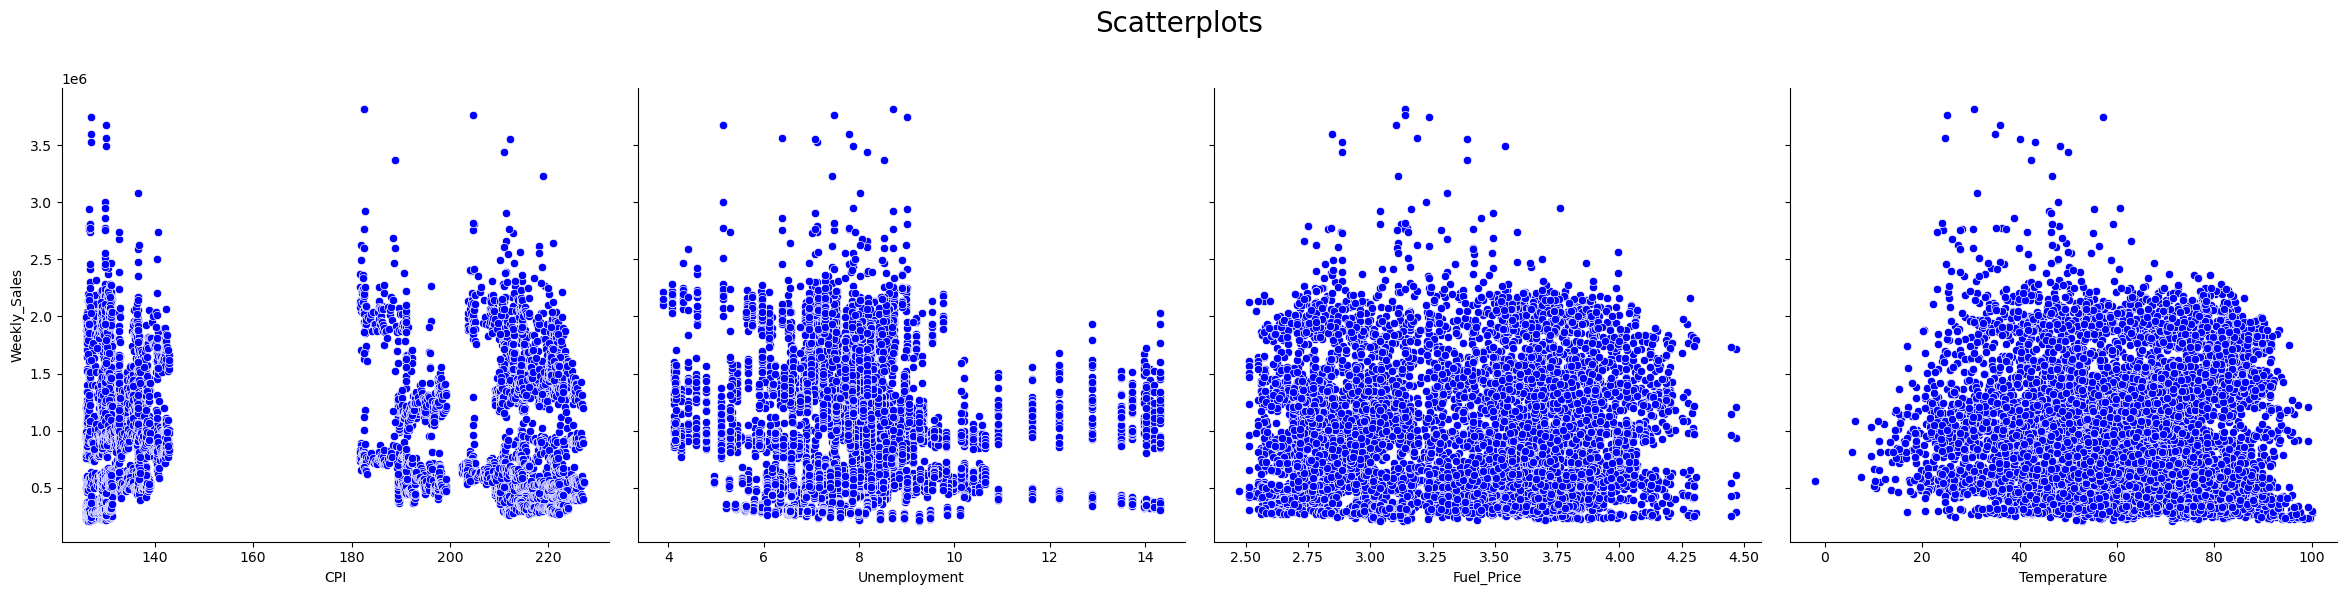

In [31]:
g = sns.PairGrid(advertising, y_vars=["Weekly_Sales"], x_vars=["CPI", "Unemployment", "Fuel_Price", "Temperature"], height=6)
g.map(sns.scatterplot, color="blue") # display a scatterplot of sales vs. each independent variable
g.fig.suptitle('Scatterplots', fontsize=20)
g.fig.subplots_adjust(top=0.85) 
plt.show()

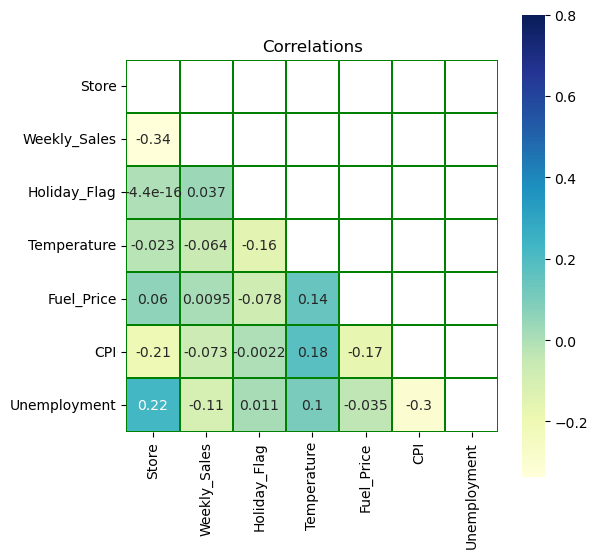

In [119]:
corr=advertising.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(6, 6))
sns.heatmap(corr, mask=mask, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="green")
plt.title('Correlations')
plt.show()

In [35]:
advertising.shape

(6435, 7)

In [37]:
advertising.shape[0]

6435

In [39]:
X_Weekly_Sales = pd.DataFrame({'intercept': np.ones(advertising.shape[0]),'Weekly_Sales': advertising['Weekly_Sales']})
y = pd.DataFrame(advertising['Weekly_Sales'])

In [41]:
X_Weekly_Sales

,intercept,Weekly_Sales
0,1.0,1643690.90
1,1.0,1641957.44
2,1.0,1611968.17
3,1.0,1409727.59
4,1.0,1554806.68
...,...,...
6430,1.0,713173.95
6431,1.0,733455.07
6432,1.0,734464.36
6433,1.0,718125.53


In [43]:
y

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


In [ ]:
#pip install statsmodels

In [45]:
import statsmodels.api as sm

In [47]:
model_Weekly_Sales = sm.OLS(y, X_Weekly_Sales)

In [51]:
results_Weekly_Sales = model_Weekly_Sales.fit()

In [53]:
results_Weekly_Sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.437e+33
Date:                Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                        16:10:08   Log-Likelihood:             1.2308e+05
No. Observations:                6435   AIC:                        -2.462e+05
Df Residuals:                    6433   BIC:                        -2.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.943e-09   3.14e-11     61.920      0.000    1.88e-09       2e-09
Weekly_Sales     1.0000   2.64e-17   3.79e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      447.869   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.542
Skew:                           0.708   Prob(JB):                    9.36e-119
Kurtosis:                       2.848   Cond. No.                     2.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
results_Weekly_Sales.params

intercept       1.942936e-09
Weekly_Sales    1.000000e+00
dtype: float64

In [57]:
y_pred=model_Weekly_Sales.predict(results_Weekly_Sales.params)

In [59]:
y_pred[0:10]

array([1643690.9 , 1641957.44, 1611968.17, 1409727.59, 1554806.68,
       1439541.59, 1472515.79, 1404429.92, 1594968.28, 1545418.53])

In [61]:
len(y_pred)

6435

In [63]:
from sklearn import metrics

In [65]:
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y, y_pred))
print('Max Error:', metrics.max_error(y, y_pred))
print('R^2:', metrics.r2_score(y, y_pred))

Mean Squared Error (MSE): 1.4259086895711556e-18
Root Mean Squared Error (RMSE): 1.1941141861527128e-09
Explained Variance Score: 1.0
Max Error: 1.775333657860756e-09
R^2: 1.0


In [67]:
print(np.corrcoef(advertising['CPI'], advertising['Weekly_Sales']))

[[ 1.         -0.07263416]
 [-0.07263416  1.        ]]


In [ ]:
0.78222442**2

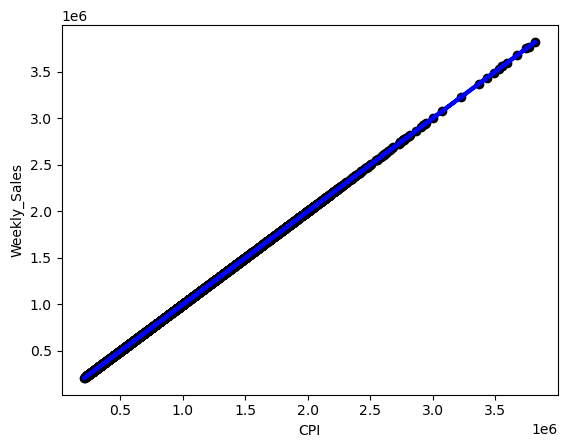

In [69]:
plt.scatter(X_Weekly_Sales['Weekly_Sales'], y, color="black")
plt.plot(X_Weekly_Sales['Weekly_Sales'], y_pred, color="blue", linewidth=3)
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

In [71]:
X_Temperature = pd.DataFrame(advertising['Temperature'])

In [73]:
X_Temperature.head()

,Temperature
0,42.31
1,38.51
2,39.93
3,46.63
4,46.50


In [77]:
X_Temperature = sm.add_constant(X_Temperature)
y = pd.DataFrame(advertising['Weekly_Sales'])

In [79]:
X_Temperature.head()

,const,Temperature
0,1.0,42.31
1,1.0,38.51
2,1.0,39.93
3,1.0,46.63
4,1.0,46.50


In [81]:
model_Temperature = sm.OLS(y, X_Temperature)
results_Temperature = model_Temperature.fit()
results_Temperature.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     26.30
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.01e-07
Time:                        16:13:57   Log-Likelihood:                -94339.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.165e+06   2.41e+04     48.279      0.000    1.12e+06    1.21e+06
Temperature -1952.4192    380.708     -5.128      0.000   -2698.733   -1206.106
==============================================================================
Omnibus:                      401.787   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.264
Skew:                           0.670   Prob(JB):                    3.13e-105
Kurtosis:                       2.974   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
y_pred=model_Temperature.predict(results_Temperature.params)

In [87]:
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y, y_pred))
print('Max Error:', metrics.max_error(y, y_pred))
print('R^2:', metrics.r2_score(y, y_pred))

Mean Squared Error (MSE): 317163507625.06067
Root Mean Squared Error (RMSE): 563172.7156255536
Explained Variance Score: 0.004071717781964024
Max Error: 2713004.9413679214
R^2: 0.004071717781963913


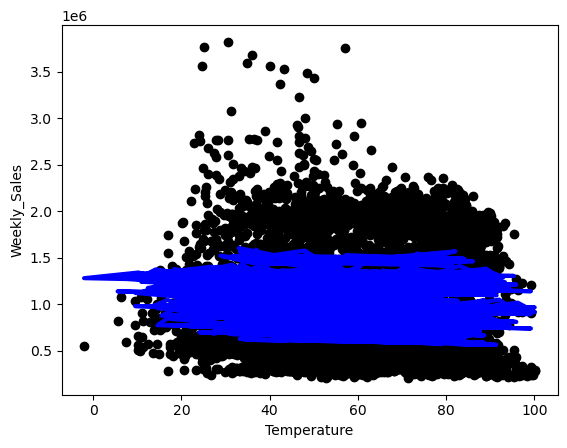

In [141]:
plt.scatter(X_Radio['Temperature'], y, color="black")
plt.plot(X_Radio['Temperature'], y_pred, color="blue", linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

In [97]:
X_np = pd.DataFrame(advertising['Unemployment'])
X_np = sm.add_constant(X_np)
y = pd.DataFrame(advertising['Weekly_Sales'])

model_Unemployment = sm.OLS(y, X_np)
results_Unemployment = model_Unemployment.fit()
results_Unemployment.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     73.35
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.34e-17
Time:                        16:18:23   Log-Likelihood:                -94316.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6433   BIC:                         1.886e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.302e+06   3.06e+04     42.503      0.000    1.24e+06    1.36e+06
Unemployment -3.194e+04   3729.808     -8.564      0.000   -3.93e+04   -2.46e+04
==============================================================================
Omnibus:                      362.277   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.241
Skew:                           0.630   Prob(JB):                     2.77e-93
Kurtosis:                       3.025   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
y_pred=model_Unemployment.predict(results_Unemployment.params)

In [101]:
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y, y_pred))
print('Max Error:', metrics.max_error(y, y_pred))
print('R^2:', metrics.r2_score(y, y_pred))

Mean Squared Error (MSE): 314870070651.3183
Root Mean Squared Error (RMSE): 561132.845814
Explained Variance Score: 0.011273362015053912
Max Error: 2794875.7522679633
R^2: 0.011273362015053912


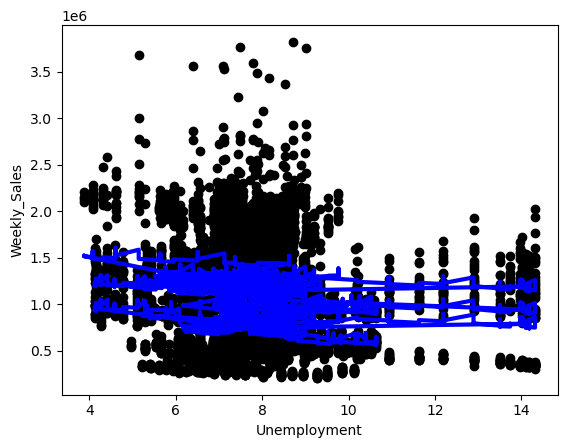

In [127]:
plt.scatter(X_np['Unemployment'], y, color="black")
plt.plot(X_np['Unemployment'], y_pred, color="blue", linewidth=3)
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.show()

In [105]:
X = advertising.drop(['Weekly_Sales'], axis=1)
X = sm.add_constant(X)
y = pd.DataFrame(advertising['Weekly_Sales'])

In [107]:
X

,const,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,1,0,42.31,2.572,211.096358,8.106
1,1.0,1,1,38.51,2.548,211.242170,8.106
2,1.0,1,0,39.93,2.514,211.289143,8.106
3,1.0,1,0,46.63,2.561,211.319643,8.106
4,1.0,1,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,1.0,45,0,64.88,3.997,192.013558,8.684
6431,1.0,45,0,64.89,3.985,192.170412,8.667
6432,1.0,45,0,54.47,4.000,192.327265,8.667
6433,1.0,45,0,56.47,3.969,192.330854,8.667


In [109]:
model_all = sm.OLS(y, X)
results_all = model_all.fit()
results_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     176.7
Date:                Fri, 02 May 2025   Prob (F-statistic):          9.33e-209
Time:                        16:19:51   Log-Likelihood:                -93861.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6428   BIC:                         1.878e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.996e+06   7.54e+04     26.461      0.000    1.85e+06    2.14e+06
Store        -1.539e+04    521.895    -29.486      0.000   -1.64e+04   -1.44e+04
Holiday_Flag  7.303e+04   2.59e+04      2.815      0.005    2.22e+04    1.24e+05
Temperature   -975.4019    375.974     -2.594      0.009   -1712.436    -238.367
Fuel_Price    9596.0739   1.48e+04      0.648      0.517   -1.94e+04    3.86e+04
CPI          -2319.4558    184.772    -12.553      0.000   -2681.670   -1957.241
Unemployment -2.188e+04   3788.000     -5.776      0.000   -2.93e+04   -1.45e+04
==============================================================================
Omnibus:                      188.961   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.250
Skew:                           0.435   Prob(JB):                     2.69e-45
Kurtosis:                       3.100   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
y_pred=model_all.predict(results_all.params)

In [113]:
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y, y_pred))
print('Max Error:', metrics.max_error(y, y_pred))
print('R^2:', metrics.r2_score(y, y_pred))

Mean Squared Error (MSE): 273380727677.84958
Root Mean Squared Error (RMSE): 522858.22904287314
Explained Variance Score: 0.14155446020106965
Max Error: 2711538.7601270424
R^2: 0.14155446020106954
